# Quantum Volume (GPU)

Make sure that `qiskit-aer-gpu` is installed.

Installation:

1.  Download the wheel from https://github.com/Qiskit/qiskit-aer/releases
2.  Install with `pip install qiskit_aer_gpu*`

(*) is the version of qiskit-aer-gpu, and should be consistent with qiskit-aer and cuda.

**Don't use `pip install qiskit-aer-gpu` directly, because the newest wheel is not in PyPI**

In [7]:
from qiskit_experiments.library import QuantumVolume
from qiskit_experiments.framework import BatchExperiment
from qiskit import transpile, execute
from qiskit.circuit.library import QuantumVolume as QuantumVolumeCircuit
from qiskit.quantum_info import Statevector

from qiskit import Aer
from qiskit_aer import AerSimulator
from qiskit_aer.noise.noise_model import NoiseModel

from quantum_volume import test_qv, test_qv_for_depths

import pandas as pd

from quantum_volume import qv_plot, qv_list_plot

## Using method from qiskit textbook

https://github.com/Qiskit/textbook/blob/main/notebooks/quantum-hardware/measuring-quantum-volume.ipynb

Procedure:

1. Set ``ncircuits`` and ``nshots``, sweep ``depth``
2. Generate ``ncircuits`` random circuits with SU(4) gates -> ideal simulation\
   ``ideal_heavy_outputs`` list of most likely 50% output states
3. For each random SU(4) ``circuit``, transpile with the noise model.\
   ``real_counts`` simulation outputs, formatted as (output state, counts)
4. If an ``output state`` is in ``ideal_heavy_outputs``, then ``N_heavy += counts``

Finally, ${\rm HOP} = N_{\rm heavy} / N_{\rm shots} N_{\rm circs} $

Standard deviation, $\sigma = \sqrt{{\rm HOP}(1-{\rm HOP})/N_{\rm circs} }$ (according to binomial distribution)

Criteria of success: ${\rm HOP} - 2\sigma > 2/3$

Quantum Volume: 256
Percentage Heavy Outputs: 77.8%
Passed?: True



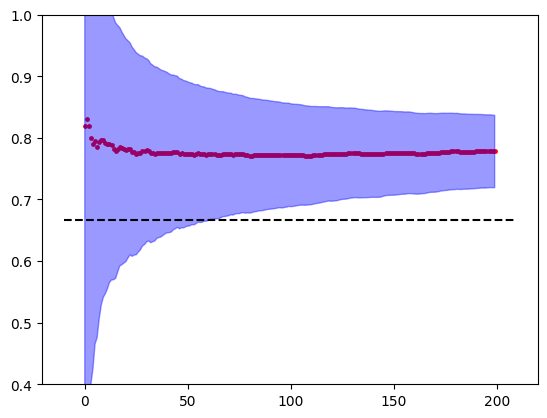

In [3]:
# Test code 

from fake_Huayi32_LE import FakeHuayi32_LE, FakeHuayi32_LEV2

simulator = FakeHuayi32_LE()

ncircuits = 200
nshots = 100
depth = 8

simulator_gpu = AerSimulator(method="statevector", 
                             device="GPU",
                             noise_model=NoiseModel.from_backend(simulator))

result, qv_circs, tr_circs = test_qv(simulator_gpu, depth, ncircuits=ncircuits, nshots=nshots)

qv_plot(result)


## Main

Run the following code in the background to sweep QV for different depths.

Output file structure:

- dirname/ (./QV_Results/)
    - backend_name/ (fake_***/)
        - summary.csv
        - depth_2/
            - summary.csv
            - circuit_1.json
            - circuit_2.json
            - ...
        - depth_3/
            - summary.csv
            - circuit_1.json
            - circuit_2.json
            - ...
        - ...

``summary.csv``


``depth_{depth}/summary.csv``

Headings:

- ideal_heavy_outputs
- n_heavy
- n_shots
- HOP
- elapsed_time
- circuit_data_file

``circuit_{#}.json``

Includes ``qv_circuit`` and ``transpiled_circuit``, as well as the test results as in the summary table.

In [2]:
%%python --bg --out output

from qiskit_aer import AerSimulator
from qiskit_aer.noise.noise_model import NoiseModel
from quantum_volume import test_qv, test_qv_for_depths

# Set simulators to check performance
from fake_Huayi35 import FakeHuayi35
simulator = FakeHuayi35()

n_circuits = 500
n_shots = 100
depths = range(2, 16)
    
simulator_gpu = AerSimulator(
    method="statevector",
    device="GPU",
    noise_model=NoiseModel.from_backend(simulator)
    )
simulator_gpu.name = simulator.name()

results = test_qv_for_depths(
    simulator_gpu, 
    depths, 
    n_circuits, 
    n_shots, 
    f"QV_{simulator.name()}")


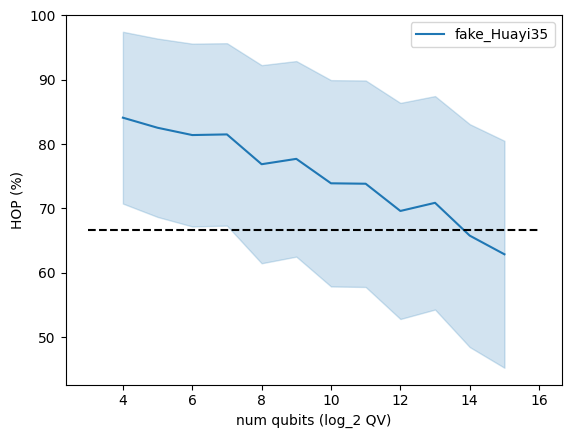

,backend,n_qubits,QV,HOP,2sigma,success,n_circuits,n_shots,elapsed_timeelapsed_time_per_circuit
0,aer_simulator,4,16,84.100000,13.352603,True,30,100,NaN
1,aer_simulator,5,32,82.533333,13.864017,True,30,100,NaN
2,aer_simulator,6,64,81.400000,14.208167,True,30,100,NaN
3,aer_simulator,7,128,81.500000,14.178622,True,30,100,NaN
4,aer_simulator,8,256,76.866667,15.397758,False,30,100,NaN
5,aer_simulator,9,512,77.700000,15.199605,False,30,100,NaN
6,aer_simulator,10,1024,73.900000,16.036583,False,30,100,NaN
7,aer_simulator,11,2048,73.833333,16.049807,False,30,100,NaN
8,aer_simulator,12,4096,69.600000,16.796190,False,30,100,NaN
9,aer_simulator,13,8192,70.866667,16.591493,False,30,100,NaN


In [1]:
# Read and plot the results from the stored files

from quantum_volume import qv_list_plot

qv_list_plot(["fake_Huayi35"])
